<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [1]:
import urllib.request
import zipfile
import os

In [2]:
print(os.getcwd())

C:\Users\rober\Downloads


In [5]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip"

zip_path = "concrete_data_week4.zip"
urllib.request.urlretrieve(url, zip_path)

('concrete_data_week4.zip', <http.client.HTTPMessage at 0x2ac16137d40>)

In [6]:
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [4]:
batch_size = 100
image_resize = 224

In [5]:
data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [6]:
train_generator = data_generator.flow_from_directory(
    "concrete_data_week4/train",
    target_size=(image_resize, image_resize),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 30001 images belonging to 2 classes.


In [7]:
val_generator = data_generator.flow_from_directory(
    "concrete_data_week4/valid",
    target_size=(image_resize, image_resize),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 9501 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(VGG16(
    include_top=False,
    weights="imagenet",
    pooling="avg"
))
model.add(Dense(2, activation="softmax"))

In [9]:
model.layers[0].trainable = False

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=2,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1
)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
301/301 ━━━━━━━━━━━━━━━━━━━━ 2490s 8s/step - accuracy: 0.9217 - loss: 0.1835 - val_accuracy: 0.9953 - val_loss: 0.0228
Epoch 2/2
301/301 ━━━━━━━━━━━━━━━━━━━━ 2230s 7s/step - accuracy: 0.9947 - loss: 0.0209 - val_accuracy: 0.9968 - val_loss: 0.0136


In [ ]:
model.save('classifier_vgg16_model.keras') 

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [12]:
from tensorflow.keras.models import load_model

In [ ]:
model_resnet = load_model("classifier_resnet_model.keras")
#model = load_model("classifier_vgg16_model.keras") # for unit test

In [19]:
test_generator = data_generator.flow_from_directory(
    "concrete_data_week4/test",
    target_size=(image_resize, image_resize),
    shuffle=False
)

Found 500 images belonging to 2 classes.


In [20]:
vgg16_loss, vgg16_acc = model.evaluate(test_generator)
resnet_loss, resnet_acc = model_resnet.evaluate(test_generator)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9990 - loss: 0.0106
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 632ms/step - accuracy: 0.9986 - loss: 0.0076


In [21]:
print(f"VGG16 acc: {vgg16_acc}, VGG16 loss: {vgg16_loss}")
print(f"ResNet50 acc: {resnet_acc}, ResNet50 loss: {resnet_loss}")

VGG16 acc: 0.9980000257492065, VGG16 loss: 0.011092967353761196
ResNet50 acc: 0.9959999918937683, ResNet50 loss: 0.009207100607454777


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [22]:
vgg16_predictions = model.predict(test_generator)
class_indices = test_generator.class_indices

16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


In [23]:
labels = dict((v, k) for k, v in class_indices.items())

In [24]:
predict_classes = np.argmax(vgg16_predictions, axis=1)

In [26]:
for i in range(5): 
    print(labels[predict_classes[i]])

negative
negative
negative
negative
negative


To showcase the predictions, an additional function to decompress the images had to be written. This was due to the images appearing in black without preprocessing.

In [ ]:
def decompress_image_vgg16(img):
    img = img.copy()
    img[:, :, 0] += 103.939  
    img[:, :, 1] += 116.779  
    img[:, :, 2] += 123.68   
    img = img[:, :, ::-1]    
    img = np.clip(img, 0, 255).astype('uint8')
    return img

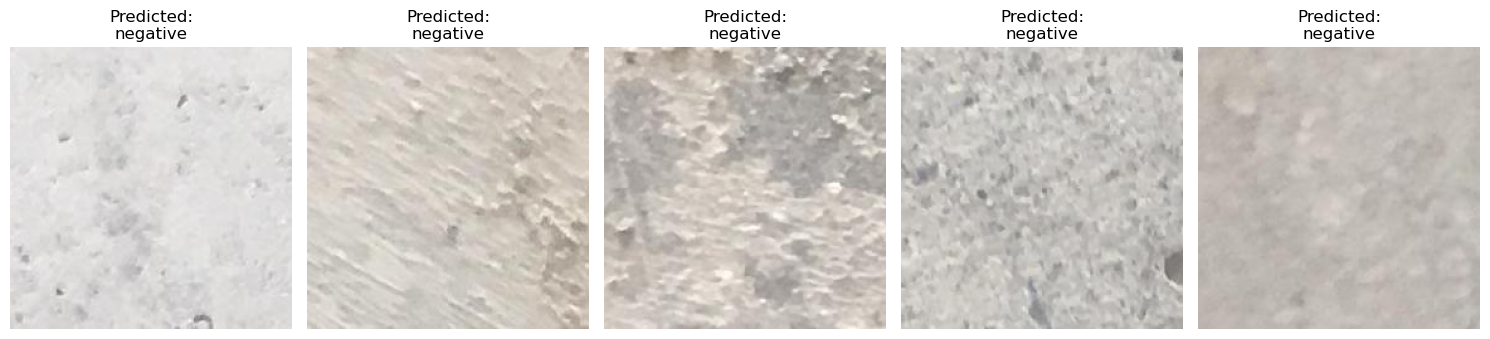

In [ ]:
import matplotlib.pyplot as plt

test_generator.reset()
images, _ = next(test_generator)

plt.figure(figsize=(15, 6))
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(decompress_image_vgg16(images[i]))
    plt.title(f"Predicted:\n{labels[predict_classes[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).